In [1]:
# Setting up by importing all the relevant libraries
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import misc

In [ ]:
# User Inputs
dir_name = r'C:\Users\ankuarora\Desktop\Client\2017_05_CogEx\2017_07_R2Implementation\Sprint 5\USIproblemstatement'
in_form = 'output.png'

In [5]:
# Loading the incoming CMS1500 Form in the form of an array
img_form = cv2.imread(os.path.join(dir_name, in_form))

# Converting the BGR image into a Grayscale image
img_form_gray = cv2.cvtColor(img_form, cv2.COLOR_BGR2GRAY)

# Checking details about the loaded image
# print(img_form_gray.shape, img_form_gray.size, img_form_gray.dtype)

error: ..\..\..\modules\imgproc\src\color.cpp:7456: error: (-215) scn == 3 || scn == 4 in function cv::ipp_cvtColor


In [4]:
gray = cv2.bitwise_not(img_form_gray)
coords = np.column_stack(np.where(gray > 0))
angle = cv2.minAreaRect(coords)[-1]
print angle

# the `cv2.minAreaRect` function returns values in the range [-90, 0); as the rectangle rotates clockwise the
# returned angle trends to 0 -- in this special case we need to add 90 degrees to the angle
if angle < -45:
    angle = -(90 + angle)
# otherwise, just take the inverse of the angle to make it positive
else:
    angle = -angle

# rotate the image to deskew it
(h, w) = img_form_gray.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(img_form_gray, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

-90.0


In [5]:
# Loading the reference markers
img_ref = cv2.imread(os.path.join(dir_name, "marker_template_to_be_identified.png"))
img_ref_gray = cv2.cvtColor(img_ref, cv2.COLOR_BGR2GRAY)
misc.toimage(img_ref_gray)

### Template Match starts

In [6]:
scales = np.arange(0.5, 2.0, 0.1)
print scales

[ 0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9]


In [7]:
scale_large = 0.0
scale_small = 0.0
max_corr = 0.0
for i in scales:
    for j in scales:
        large_image = cv2.resize(rotated,None,fx=i, fy=i, interpolation = cv2.INTER_CUBIC)
        small_image = cv2.resize(img_ref_gray,None,fx=j, fy=j, interpolation = cv2.INTER_CUBIC)
        
        method = cv2.TM_CCOEFF_NORMED
        result = cv2.matchTemplate(small_image, large_image, method)
        _,mx,_,mxLoc = cv2.minMaxLoc(result)
        print i, j, mx, mxLoc
        if mx > max_corr:
            scale_large = i
            scale_small = j
            max_corr = mx

print scale_large, scale_small, max_corr

0.5 0.5 0.897521436214 (102, 498)
0.5 0.6 0.598482966423 (346, 99)
0.5 0.7 0.573068737984 (46, 1008)
0.5 0.8 0.544784605503 (36, 1007)
0.5 0.9 0.527398467064 (78, 61)
0.5 1.0 0.5183801651 (41, 1005)
0.5 1.1 0.507434666157 (34, 1003)
0.5 1.2 0.530440092087 (40, 57)
0.5 1.3 0.487175405025 (31, 1000)
0.5 1.4 0.461768239737 (19, 54)
0.5 1.5 0.456885904074 (10, 994)
0.5 1.6 0.436626672745 (5, 993)
0.5 1.7 0.41488686204 (8, 991)
0.5 1.8 0.415055096149 (33, 49)
0.5 1.9 0.390822350979 (27, 46)
0.6 0.5 0.606301188469 (55, 997)
0.6 0.6 0.925184547901 (122, 598)
0.6 0.7 0.62074804306 (579, 236)
0.6 0.8 0.584578990936 (122, 76)
0.6 0.9 0.574336826801 (50, 1209)
0.6 1.0 0.531968295574 (41, 1207)
0.6 1.1 0.52889752388 (92, 73)
0.6 1.2 0.519363284111 (49, 1205)
0.6 1.3 0.513637304306 (42, 1204)
0.6 1.4 0.533959925175 (51, 69)
0.6 1.5 0.516074538231 (45, 68)
0.6 1.6 0.475957036018 (35, 1199)
0.6 1.7 0.45860260725 (19, 1194)
0.6 1.8 0.451192289591 (11, 1193)
0.6 1.9 0.44121029973 (5, 1191)
0.7 0.5 0.50

In [8]:
large_image = cv2.resize(rotated,None,fx=scale_large, fy=scale_large, interpolation = cv2.INTER_CUBIC)
small_image = cv2.resize(img_ref_gray,None,fx=scale_small, fy=scale_small, interpolation = cv2.INTER_CUBIC)

In [9]:
# Finding marker positions in the incoming form
# small_image = img_ref_gray
# large_image = res

method = cv2.TM_CCOEFF_NORMED
result = cv2.matchTemplate(small_image, large_image, method)
_,mx,_,mxLoc = cv2.minMaxLoc(result)

In [10]:
# print mnLoc
print mx

0.999997735023


In [11]:
h, w = small_image.shape
x, y = mxLoc
print x, y, h, w

204 997 30 137


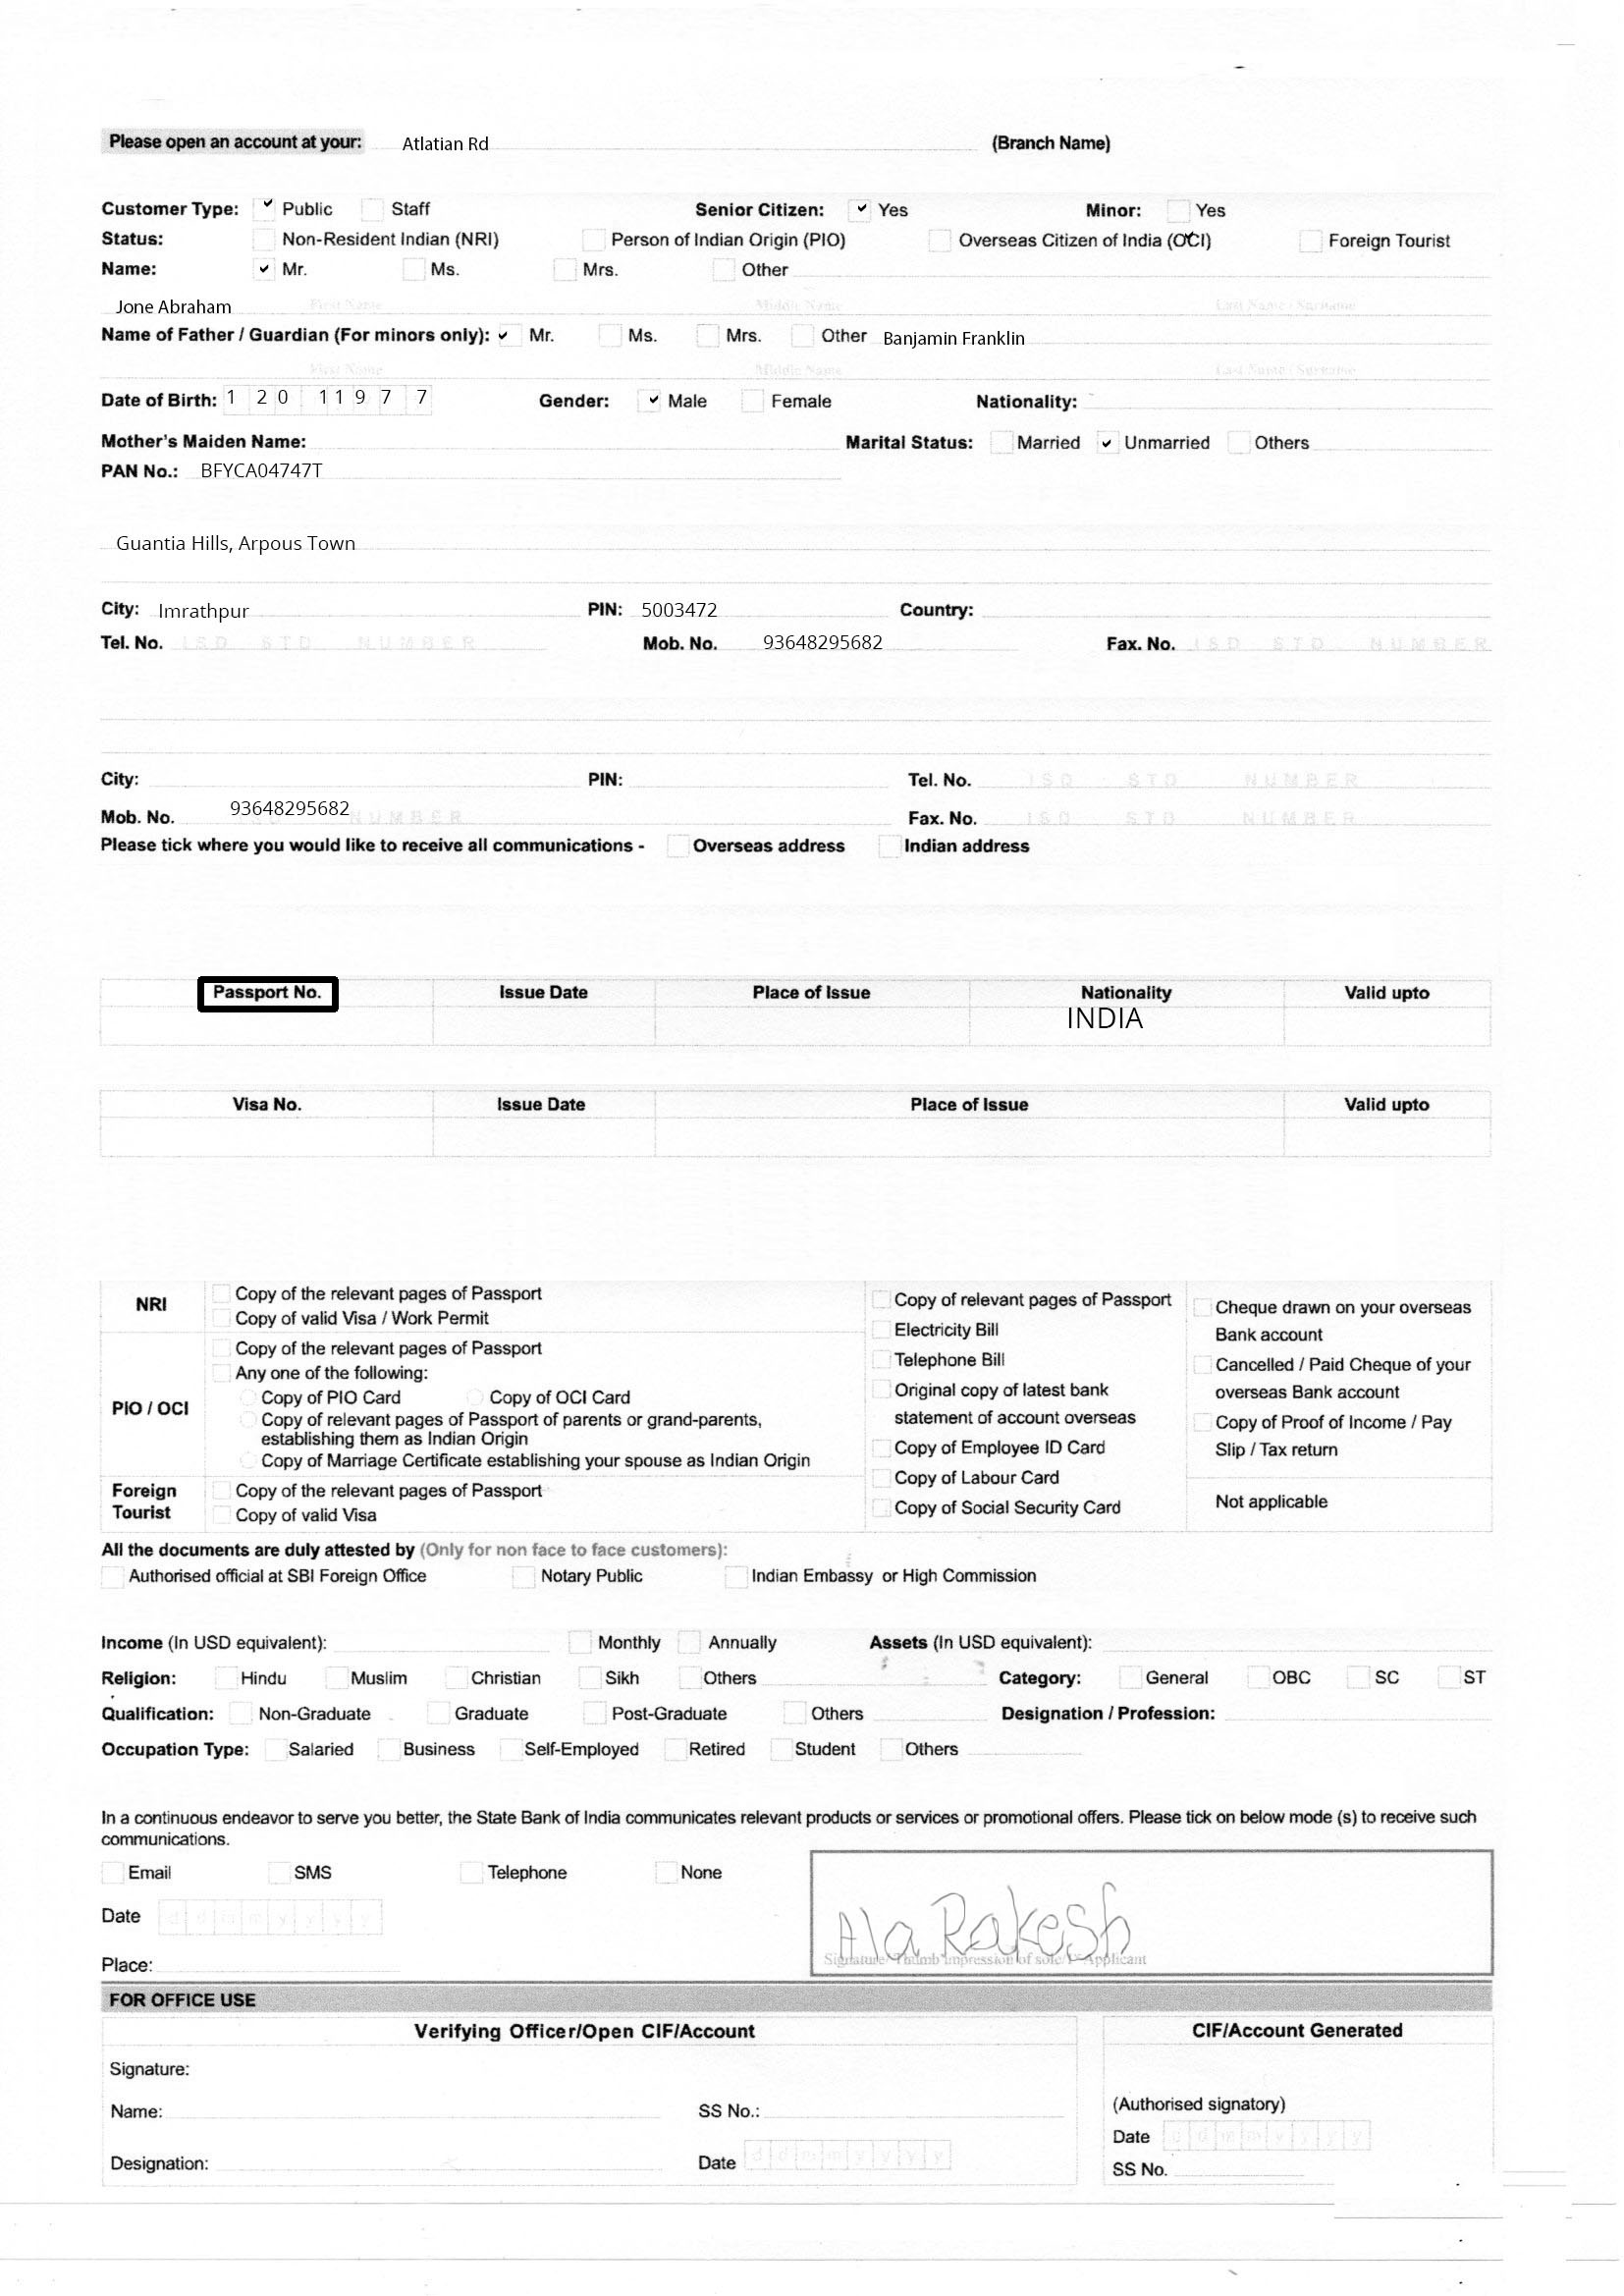

In [12]:
top_left = mxLoc
bottom_right = (x + w, y + h)
# misc.toimage(large_image[y:y+h,x:x+w])
misc.toimage(cv2.rectangle(large_image, top_left, bottom_right, (0,0,255), 5))